# Introduction

describe what...

## Libraries

In [1]:
# for scientific computing with Python
import pandas as pd
import numpy as np
import os as os

# charting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sn

## Load Data

In [2]:
oecdDf = pd.read_csv('../DataAnalytics/Data/OECD_QualityOfLife.csv', sep=',')

## Clean Data

In [3]:
#oecdDf.info()

### Set Index on Countries

In [4]:
oecdDf.set_index(oecdDf.columns[0], inplace=True)

### Drop Questionable Columns

In [5]:
oecdTrimmed = oecdDf.drop(oecdDf.iloc[:,26:36], axis=1, inplace=False)
#oecdTrimmed.info()#oecdTrimmed.info()

In [6]:
oecdTrimmed.drop(oecdTrimmed.columns[[14]], axis=1, inplace=True)
#oecdTrimmed.info()

### Drop Asia

In [7]:
oecdTrimmed.drop('Korea',inplace=True)
oecdTrimmed.drop('Japan',inplace=True)

## Charting OECD Analysis

### Countries

In [8]:
oecdTrimmed.index

Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy',
       'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

In [9]:
oecdCorr = oecdTrimmed.corr()
#oecdCorr

### Filter for Significant Correlations

In [10]:
filtervalue = .5
filterDf = oecdCorr[((oecdCorr >= filtervalue) | (oecdCorr <= -filtervalue)) & (oecdCorr !=1.000)]
#filterDf

### Generate Heatmap

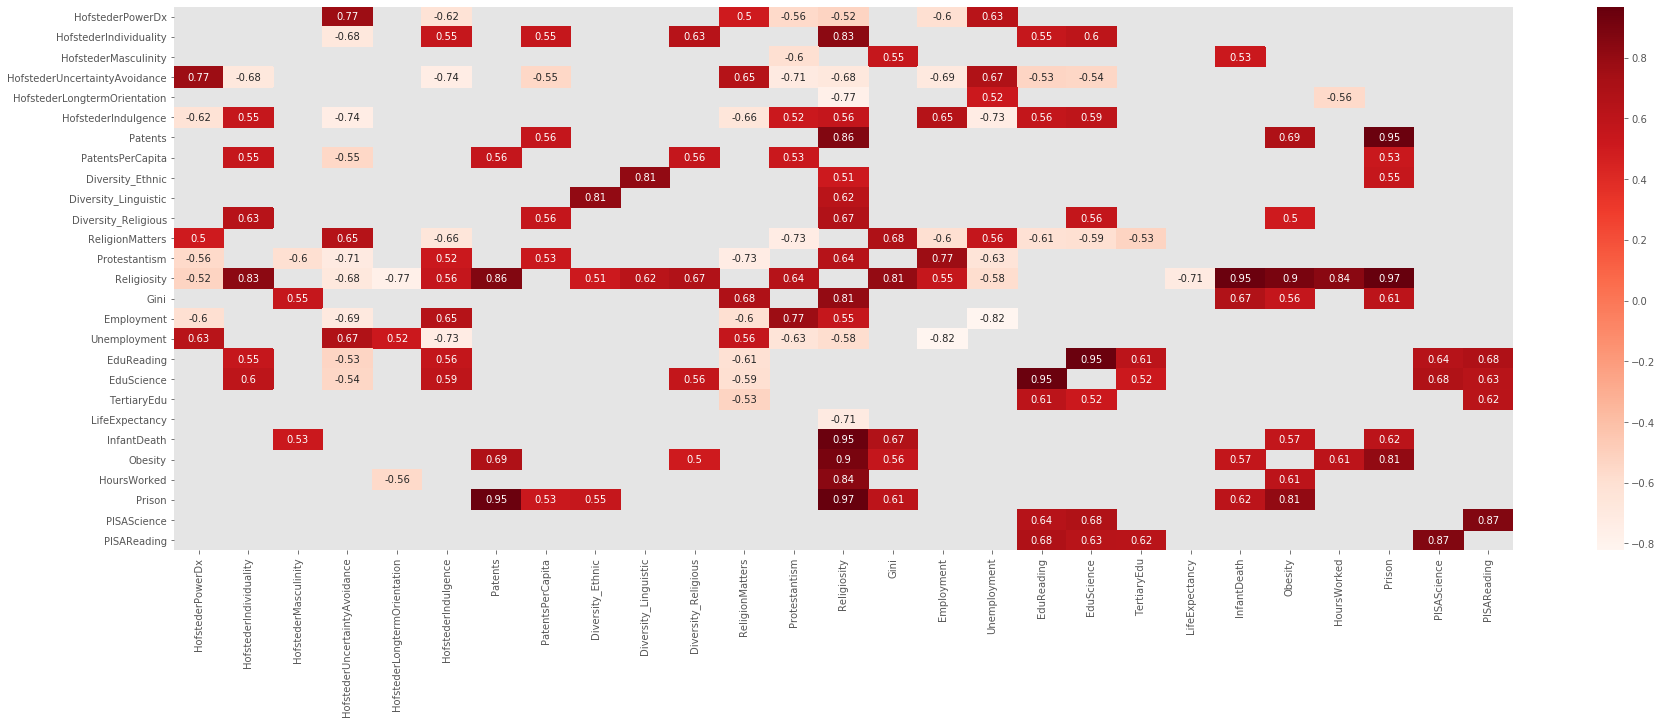

In [11]:
plt.figure(figsize=(30,10))
sn.heatmap(filterDf, annot=True, cmap="Reds")
plt.show()

## Correlate, Filter, and Flatten

### A Function

In [12]:
def corrFilter(x: pd.DataFrame, bound: float):   
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

newList = corrFilter(oecdTrimmed, filtervalue)

In [13]:
newList

Unemployment         Employment                      -0.822140
Religiosity          HofstederLongtermOrientation    -0.773114
HofstederIndulgence  HofstederUncertaintyAvoidance   -0.735239
Protestantism        ReligionMatters                 -0.727853
Unemployment         HofstederIndulgence             -0.725356
                                                        ...   
InfantDeath          Religiosity                      0.950939
EduReading           EduScience                       0.951850
Prison               Patents                          0.953625
Religiosity          Prison                           0.968031
HofstederPowerDx     HofstederPowerDx                      NaN
Length: 86, dtype: float64

### A function for Search and Filter of the Series

In [14]:
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

### Error Test

In [15]:
filterForLabels(newList, 'errortest')

""


### Hofstede Correlations

In [16]:
filterForLabels(newList, 'HofstederPowerDx')

,Corr
HofstederIndulgence,-0.623498
Religiosity,-0.521531
ReligionMatters,0.501376
HofstederUncertaintyAvoidance,0.771210
HofstederPowerDx,0.000000
Employment,-0.595200
Protestantism,-0.560072
Unemployment,0.628423


In [29]:
filterForLabels(newList, 'HofstederIndividuality')

,Corr
HofstederUncertaintyAvoidance,-0.675465
EduReading,0.551888
HofstederIndulgence,0.551925
PatentsPerCapita,0.554806
EduScience,0.598269
Religiosity,0.834589
Diversity_Religious,0.633185


In [28]:
filterForLabels(newList, 'HofstederMasculinity')

,Corr
Protestantism,-0.595321
Gini,0.550708
InfantDeath,0.527107


In [30]:
filterForLabels(newList, 'HofstederUncertaintyAvoidance')

,Corr
Protestantism,-0.705497
PatentsPerCapita,-0.546334
ReligionMatters,0.648589
HofstederIndulgence,-0.735239
Employment,-0.692188
Religiosity,-0.679254
HofstederIndividuality,-0.675465
EduScience,-0.537632
EduReading,-0.529460
Unemployment,0.674791


In [33]:
filterForLabels(newList, 'HofstederLongtermOrientation')

,Corr
HoursWorked,-0.562984
Unemployment,0.519325
Religiosity,-0.773114


In [32]:
filterForLabels(newList, 'HofstederIndulgence')

,Corr
HofstederUncertaintyAvoidance,-0.735239
ReligionMatters,-0.657037
Protestantism,0.523326
EduScience,0.591547
Unemployment,-0.725356
HofstederPowerDx,-0.623498
HofstederIndividuality,0.551925
Religiosity,0.560566
EduReading,0.562817
Employment,0.650006


### Relevant Results - Wellbeing

In [17]:
filterForLabels(newList, 'Gini')

,Corr
Obesity,0.556547
ReligionMatters,0.681426
Religiosity,0.806833
HofstederMasculinity,0.550708
Prison,0.608900
InfantDeath,0.668901


In [18]:
filterForLabels(newList, 'InfantDeath')

,Corr
HofstederMasculinity,0.527107
Gini,0.668901
Religiosity,0.950939
Obesity,0.570650
Prison,0.616458


In [19]:
filterForLabels(newList, 'Obesity')

,Corr
InfantDeath,0.570650
HoursWorked,0.606204
Patents,0.688263
Prison,0.812617
Diversity_Religious,0.500854
Gini,0.556547
Religiosity,0.900106


In [20]:
filterForLabels(newList, 'Protestantism')

,Corr
ReligionMatters,-0.727853
Unemployment,-0.633935
HofstederPowerDx,-0.560072
PatentsPerCapita,0.531227
HofstederUncertaintyAvoidance,-0.705497
HofstederMasculinity,-0.595321
HofstederIndulgence,0.523326
Religiosity,0.642075
Employment,0.765555


In [21]:
filterForLabels(newList, 'ReligionMatters')

,Corr
EduScience,-0.592280
TertiaryEdu,-0.525470
Unemployment,0.558240
Protestantism,-0.727853
HofstederIndulgence,-0.657037
EduReading,-0.612084
Employment,-0.597926
HofstederPowerDx,0.501376
HofstederUncertaintyAvoidance,0.648589
Gini,0.681426


In [22]:
filterForLabels(newList, 'Religiosity')

,Corr
HofstederLongtermOrientation,-0.773114
LifeExpectancy,-0.705867
HofstederUncertaintyAvoidance,-0.679254
Unemployment,-0.582323
Employment,0.550551
HofstederIndulgence,0.560566
Protestantism,0.642075
Diversity_Religious,0.670587
HoursWorked,0.839779
Patents,0.864056


### Relevant Results - Education

In [23]:
filterForLabels(newList, 'PatentsPerCapita')

,Corr
Patents,0.557863
Diversity_Religious,0.561090
HofstederUncertaintyAvoidance,-0.546334
Prison,0.528283
Protestantism,0.531227
HofstederIndividuality,0.554806


In [24]:
filterForLabels(newList, 'TertiaryEdu')

,Corr
PISAReading,0.621375
ReligionMatters,-0.525470
EduScience,0.519115
EduReading,0.613426


### Relevant Results - Work

In [25]:
filterForLabels(newList, 'Employment')

,Corr
HofstederUncertaintyAvoidance,-0.692188
ReligionMatters,-0.597926
HofstederPowerDx,-0.595200
HofstederIndulgence,0.650006
Protestantism,0.765555
Unemployment,-0.822140
Religiosity,0.550551


In [26]:
filterForLabels(newList, 'Unemployment')

,Corr
Employment,-0.822140
HofstederIndulgence,-0.725356
HofstederPowerDx,0.628423
HofstederUncertaintyAvoidance,0.674791
Protestantism,-0.633935
Religiosity,-0.582323
HofstederLongtermOrientation,0.519325
ReligionMatters,0.558240


In [27]:
filterForLabels(newList, 'HoursWorked')

,Corr
HofstederLongtermOrientation,-0.562984
Obesity,0.606204
Religiosity,0.839779
